In [56]:
#|deafult_export painters_app
import gradio as gr
from fastai.vision.all import *
import os

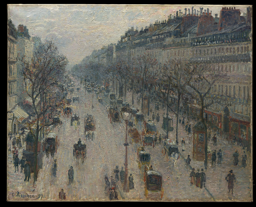

In [38]:
im = PILImage.create('paintings_examples/pissarro1.jpeg')
im.thumbnail((256,256))
im

In [39]:
#|export
learn = load_learner('painters_model.pkl')

In [40]:
%time learn.predict(im)

CPU times: user 31.3 ms, sys: 18.5 ms, total: 49.8 ms
Wall time: 27.1 ms


('camille_pissarro',
 tensor(0),
 tensor([9.9945e-01, 5.0689e-04, 4.0332e-06, 9.0547e-07, 3.4768e-05]))

In [41]:
#|export
painters_categories = list(learn.dls.vocab)

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(painters_categories, map(float, probs)))

In [42]:
classify_image(im)

{'camille_pissarro': 0.9994533658027649,
 'claude_monet': 0.000506893265992403,
 'paul_cézanne': 4.033235200040508e-06,
 'pierre-auguste_renoir': 9.054719498635677e-07,
 'vincent_van_gogh': 3.4768181649269536e-05}

In [50]:
#| export
image = gr.components.Image(shape=(192, 192))
label = gr.components.Label()
examples_dir = 'paintings_examples'

examples = [os.path.join(examples_dir, file) for file in os.listdir(examples_dir)]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
